Epoch 1/20: Loss=1.3110, Train Acc=44.51%, Test Acc=55.83%
Epoch 2/20: Loss=0.7423, Train Acc=66.11%, Test Acc=77.67%
Epoch 3/20: Loss=0.6441, Train Acc=70.88%, Test Acc=79.25%
Epoch 4/20: Loss=0.5299, Train Acc=76.67%, Test Acc=75.69%
Epoch 5/20: Loss=0.4902, Train Acc=77.98%, Test Acc=86.26%
Epoch 6/20: Loss=0.4590, Train Acc=81.24%, Test Acc=86.07%
Epoch 7/20: Loss=0.4490, Train Acc=81.29%, Test Acc=83.30%
Epoch 8/20: Loss=0.3774, Train Acc=84.31%, Test Acc=77.67%
Epoch 9/20: Loss=0.3693, Train Acc=84.18%, Test Acc=80.83%
Epoch 10/20: Loss=0.3569, Train Acc=84.90%, Test Acc=89.13%
Epoch 11/20: Loss=0.2882, Train Acc=87.84%, Test Acc=91.11%
Epoch 12/20: Loss=0.2823, Train Acc=88.36%, Test Acc=89.33%
Epoch 13/20: Loss=0.3185, Train Acc=86.48%, Test Acc=87.94%
Epoch 14/20: Loss=0.2742, Train Acc=88.06%, Test Acc=85.67%
Epoch 15/20: Loss=0.2988, Train Acc=87.64%, Test Acc=86.96%
Epoch 16/20: Loss=0.2411, Train Acc=89.64%, Test Acc=91.11%
Epoch 17/20: Loss=0.2631, Train Acc=88.41%, Test 

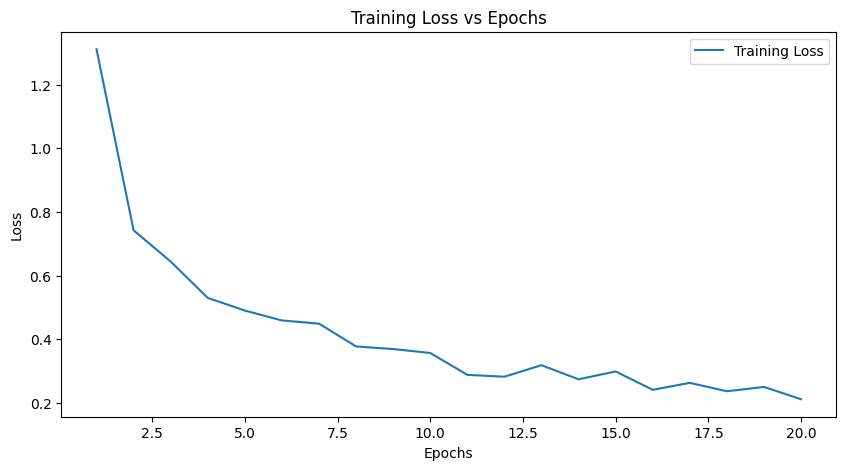

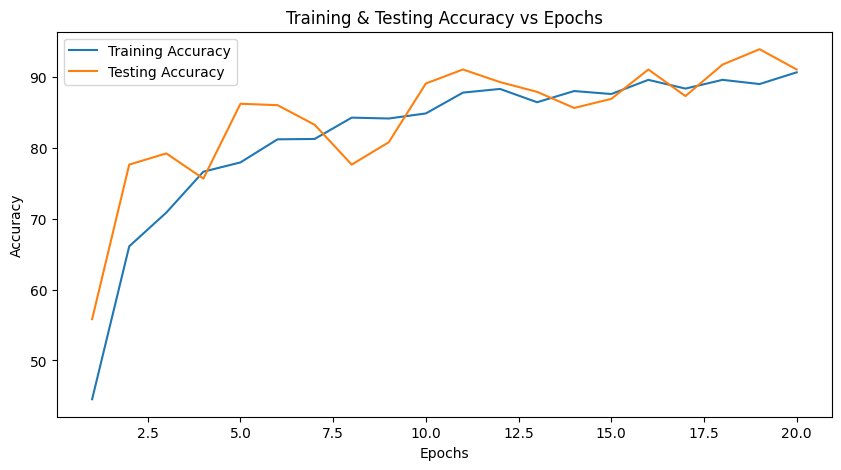

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
dataset = datasets.ImageFolder(root="HAR_Images", transform=transform)

# Split into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define ANN model
class ANN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten images
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
input_size = 64 * 64 * 3  # Flattened image size
num_classes = len(dataset.classes)
model = ANN(input_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 20
train_losses, train_accuracies, test_accuracies = [], [], []

for epoch in range(epochs):
    model.train()
    correct, total, train_loss = 0, 0, 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)
    
    print(f"Epoch {epoch+1}/{epochs}: Loss={train_losses[-1]:.4f}, Train Acc={train_accuracy:.2f}%, Test Acc={test_accuracy:.2f}%")

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

# Plot Accuracy vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Testing Accuracy vs Epochs')
plt.legend()
plt.show()
